<a href="https://colab.research.google.com/github/Zefanya-Dev/VanezaZefanya/blob/main/Unilever_Sentimen_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import unicodedata
import nltk
!pip install stanza
import stanza
stanza.download('id')
nlp = stanza.Pipeline('id')
from nltk.corpus import stopwords
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
nltk.download('punkt')
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zurizi/data/refs/heads/main/unilever-tweet.csv', on_bad_lines='skip')

In [ ]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1941116587928600663,Sun Jul 06 11:33:32 +0000 2025,0,@nabilasaftr @lilaccountz Produk wings distrib...,1941822822625447960,NaN,nabilasaftr,in,NaN,0,0,0,https://x.com/undefined/status/194182282262544...,1083246308868030466,NaN
1,1941116587928600663,Sun Jul 06 04:54:46 +0000 2025,0,@lilaccountz Aku belanja pake scanner boikot b...,1941722467988537824,NaN,lilaccountz,in,NaN,0,0,0,https://x.com/undefined/status/194172246798853...,1762790235484880897,NaN
2,1941116587928600663,Sat Jul 05 12:17:26 +0000 2025,0,@lilaccountz Hahah buzer wings bermunculan,1941471482502316161,NaN,lilaccountz,nl,NaN,0,0,0,https://x.com/undefined/status/194147148250231...,50264900,NaN
3,1941116587928600663,Sat Jul 05 11:32:06 +0000 2025,0,@reginald_farabi @lilaccountz Pake selsun coba...,1941460073819275531,NaN,reginald_farabi,in,NaN,0,0,0,https://x.com/undefined/status/194146007381927...,865813398,NaN
4,1941116587928600663,Sat Jul 05 11:28:01 +0000 2025,0,@amirasver @reginald_farabi @lilaccountz Tapi ...,1941459045384433925,NaN,amirasver,in,NaN,0,0,0,https://x.com/undefined/status/194145904538443...,1378257084,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,1922812783436947764,Thu May 15 05:40:05 +0000 2025,1291,@logos_id Negara demokrasi tapi sering ngejek ...,1922889702807425062,NaN,logos_id,in,NaN,0,0,21,https://x.com/undefined/status/192288970280742...,1449423062118461443,NaN
5854,1922812783436947764,Thu May 15 05:40:01 +0000 2025,6,@sigantengaduhai @logos_id Gak bisa bahasa eng...,1922889687040926111,NaN,sigantengaduhai,in,NaN,0,2,0,https://x.com/undefined/status/192288968704092...,1860786081278705664,NaN
5855,1922812783436947764,Thu May 15 05:37:16 +0000 2025,1,@sigantengaduhai @logos_id lu gagal paham bro,1922888995194740972,NaN,sigantengaduhai,in,NaN,0,3,0,https://x.com/undefined/status/192288899519474...,1868588428075708416,NaN
5856,1922812783436947764,Thu May 15 05:25:26 +0000 2025,0,@sigantengaduhai @logos_id wkwkwkwk betul,1922886014604902776,NaN,sigantengaduhai,in,NaN,0,1,0,https://x.com/undefined/status/192288601460490...,765883842,NaN


#Text Preprocessing


In [ ]:
df_selected = df[['full_text', 'lang']]

,full_text,lang
0,@nabilasaftr @lilaccountz Produk wings distrib...,in
1,@lilaccountz Aku belanja pake scanner boikot b...,in
2,@lilaccountz Hahah buzer wings bermunculan,nl
3,@reginald_farabi @lilaccountz Pake selsun coba...,in
4,@amirasver @reginald_farabi @lilaccountz Tapi ...,in


In [ ]:
languages_to_keep = ['in', 'en', 'und', 'tl']
df_selected = df_selected[df_selected['lang'].isin(languages_to_keep)]
display(df_selected)

,full_text,lang
0,@nabilasaftr @lilaccountz Produk wings distrib...,in
1,@lilaccountz Aku belanja pake scanner boikot b...,in
3,@reginald_farabi @lilaccountz Pake selsun coba...,in
4,@amirasver @reginald_farabi @lilaccountz Tapi ...,in
5,@ToresAbdul @lilaccountz Itu dr mana kak? Bagu...,in
...,...,...
5853,@logos_id Negara demokrasi tapi sering ngejek ...,in
5854,@sigantengaduhai @logos_id Gak bisa bahasa eng...,in
5855,@sigantengaduhai @logos_id lu gagal paham bro,in
5856,@sigantengaduhai @logos_id wkwkwkwk betul,in


In [ ]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions including underscore
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[^\w\s]', '', text)  # Remove symbols
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'[\U00010000-\U0010ffff]','', text) # Remove emojis using regex
    return text

df_selected['cleaned_text'] = df_selected['full_text'].apply(clean_text)
df_selected = df_selected.drop_duplicates()
df_selected = df_selected.dropna()
df_selected = df_selected.reset_index(drop=True)

df_selected = df_selected[['lang', 'cleaned_text']]
df_selected

,lang,cleaned_text
0,in,Produk wings distribusinya pake salim grup y...
1,in,Aku belanja pake scanner boikot biar ga pusin...
2,in,Pake selsun coba kak
3,in,Tapi sama terafiliasi yaa
4,in,Itu dr mana kak Bagus kah
...,...,...
5461,in,Negara demokrasi tapi sering ngejek kebebasan...
5462,in,Gak bisa bahasa enggres ya
5463,in,lu gagal paham bro
5464,in,wkwkwkwk betul


In [ ]:
from transformers import pipeline

pipe_translate = pipeline("translation", model="Helsinki-NLP/opus-mt-en-id")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [ ]:
df_en = df_selected[df_selected['lang'] == 'en'].copy()
df_en['translated_text'] = df_en['cleaned_text'].apply(lambda x: pipe_translate(x)[0]['translation_text'])

df_selected = df_selected.merge(df_en[['cleaned_text', 'translated_text']], on='cleaned_text', how='left')

In [ ]:
df_selected['cleaned_text'] = df_selected.apply(lambda row: row['translated_text'] if row['lang'] == 'en' else row['cleaned_text'], axis=1)df

In [ ]:
df_selected = df_selected.drop(columns=['translated_text'])

In [ ]:
df_selected['cleaned_text'] = df_selected['cleaned_text'].str.lower()

In [ ]:
df_selected

,lang,cleaned_text
0,in,produk wings distribusinya pake salim grup y...
1,in,aku belanja pake scanner boikot biar ga pusin...
2,in,pake selsun coba kak
3,in,tapi sama terafiliasi yaa
4,in,itu dr mana kak bagus kah
...,...,...
5543,in,negara demokrasi tapi sering ngejek kebebasan...
5544,in,gak bisa bahasa enggres ya
5545,in,lu gagal paham bro
5546,in,wkwkwkwk betul


In [ ]:
nltk.download('stopwords')
stop_words_indonesian = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
custom_stopwords = ['nya', 'itu', 'ini', 'yg', 'gak', 'nya', 'deh', 'sih', 'aja'] # Add your custom stopwords here
all_stopwords = stop_words_indonesian.union(set(custom_stopwords))

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in all_stopwords])

df_selected['cleaned_text'] = df_selected['cleaned_text'].apply(remove_stopwords)
display(df_selected.head())

,lang,cleaned_text
0,in,produk wings distribusinya pake salim grup ind...
1,in,belanja pake scanner boikot biar ga pusing org...
2,in,pake selsun coba kak
3,in,terafiliasi yaa
4,in,dr kak bagus kah


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

df_selected['tokenized_text'] = df_selected['cleaned_text'].apply(word_tokenize)

df_tokenized_text = df_selected['tokenized_text']

In [ ]:
df_tokenized_text

,tokenized_text
0,"[produk, wings, distribusinya, pake, salim, gr..."
1,"[belanja, pake, scanner, boikot, biar, ga, pus..."
2,"[pake, selsun, coba, kak]"
3,"[terafiliasi, yaa]"
4,"[dr, kak, bagus, kah]"
...,...
5543,"[negara, demokrasi, ngejek, kebebasan, berpend..."
5544,"[bahasa, enggres, ya]"
5545,"[lu, gagal, paham, bro]"
5546,[wkwkwkwk]


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming menggunakan Sastrawi
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Terapkan stemming pada setiap daftar token yang sudah di-tokenize
df_selected['stemmed_text'] = df_selected['tokenized_text'].apply(stem_tokens)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
df_stemmed = df_selected[['lang', 'cleaned_text', 'stemmed_text']]

In [ ]:
# Fungsi untuk menggabungkan token menjadi string
def tokens_to_string(tokens):
    return ' '.join(tokens)

df_stemmed['stemmed_text'] = df_selected['stemmed_text'].apply(tokens_to_string)

df_stemmed

/tmp/ipython-input-2171467157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stemmed['stemmed_text'] = df_selected['stemmed_text'].apply(tokens_to_string)


,lang,cleaned_text,stemmed_text
0,in,produk wings distribusinya pake salim grup ind...,p r o d u k w i n g s d i s t r i b u s i ...
1,in,belanja pake scanner boikot biar ga pusing org...,b e l a n j a p a k e s c a n n e r b o ...
2,in,pake selsun coba kak,p a k e s e l s u n c o b a k a k
3,in,terafiliasi yaa,a f i l i a s i y a a
4,in,dr kak bagus kah,d r k a k b a g u s k a h
...,...,...,...
5543,in,negara demokrasi ngejek kebebasan berpendapat ...,n e g a r a d e m o k r a s i n g e j e k ...
5544,in,bahasa enggres ya,b a h a s a e n g g r e s y a
5545,in,lu gagal paham bro,l u g a g a l p a h a m b r o
5546,in,wkwkwkwk,w k w k w k w k


In [ ]:
df_stemmed

,lang,cleaned_text,stemmed_text
0,in,produk wings distribusinya pake salim grup ind...,produk wings distribusi pake salim grup indofo...
1,in,belanja pake scanner boikot biar ga pusing org...,belanja pake scanner boikot biar ga pusing org...
2,in,pake selsun coba kak,pake selsun coba kak
3,in,terafiliasi yaa,afiliasi yaa
4,in,dr kak bagus kah,dr kak bagus kah
...,...,...,...
5543,in,negara demokrasi ngejek kebebasan berpendapat ...,negara demokrasi ngejek bebas dapat negara kom...
5544,in,bahasa enggres ya,bahasa enggres ya
5545,in,lu gagal paham bro,lu gagal paham bro
5546,in,wkwkwkwk,wkwkwkwk


In [ ]:
df_stemmed = df_stemmed.drop_duplicates()

In [ ]:
df_stemmed

,lang,cleaned_text,stemmed_text
0,in,produk wings distribusinya pake salim grup ind...,produk wings distribusi pake salim grup indofo...
1,in,belanja pake scanner boikot biar ga pusing org...,belanja pake scanner boikot biar ga pusing org...
2,in,pake selsun coba kak,pake selsun coba kak
3,in,terafiliasi yaa,afiliasi yaa
4,in,dr kak bagus kah,dr kak bagus kah
...,...,...,...
5543,in,negara demokrasi ngejek kebebasan berpendapat ...,negara demokrasi ngejek bebas dapat negara kom...
5544,in,bahasa enggres ya,bahasa enggres ya
5545,in,lu gagal paham bro,lu gagal paham bro
5546,in,wkwkwkwk,wkwkwkwk


# Modeling

In [ ]:
from transformers import pipeline

pipe = pipeline("text-classification", model="poerwiyanto/bert-base-indonesian-522M-finetuned-sentiment")

config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
label = []
for index, row in df_stemmed["cleaned_text"].items():
  res = pipe(row)
  label.append(res[0]['label'])

df_stemmed["sentimen"] = label

/tmp/ipython-input-1566316543.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stemmed["sentimen"] = label


In [ ]:
df_stemmed

,lang,cleaned_text,stemmed_text,sentimen
0,in,produk wings distribusinya pake salim grup ind...,produk wings distribusi pake salim grup indofo...,LABEL_1
1,in,belanja pake scanner boikot biar ga pusing org...,belanja pake scanner boikot biar ga pusing org...,LABEL_0
2,in,pake selsun coba kak,pake selsun coba kak,LABEL_1
3,in,terafiliasi yaa,afiliasi yaa,LABEL_2
4,in,dr kak bagus kah,dr kak bagus kah,LABEL_2
...,...,...,...,...
5543,in,negara demokrasi ngejek kebebasan berpendapat ...,negara demokrasi ngejek bebas dapat negara kom...,LABEL_0
5544,in,bahasa enggres ya,bahasa enggres ya,LABEL_0
5545,in,lu gagal paham bro,lu gagal paham bro,LABEL_2
5546,in,wkwkwkwk,wkwkwkwk,LABEL_0


In [ ]:
label_mapping = {'LABEL_0': 'negatif', 'LABEL_1': 'netral', 'LABEL_2': 'positif'}
df_stemmed['sentimen'] = df_stemmed['sentimen'].map(label_mapping)
display(df_stemmed.head())

/tmp/ipython-input-126848433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stemmed['sentimen'] = df_stemmed['sentimen'].map(label_mapping)


,lang,cleaned_text,stemmed_text,sentimen
0,in,produk wings distribusinya pake salim grup ind...,produk wings distribusi pake salim grup indofo...,netral
1,in,belanja pake scanner boikot biar ga pusing org...,belanja pake scanner boikot biar ga pusing org...,negatif
2,in,pake selsun coba kak,pake selsun coba kak,netral
3,in,terafiliasi yaa,afiliasi yaa,positif
4,in,dr kak bagus kah,dr kak bagus kah,positif


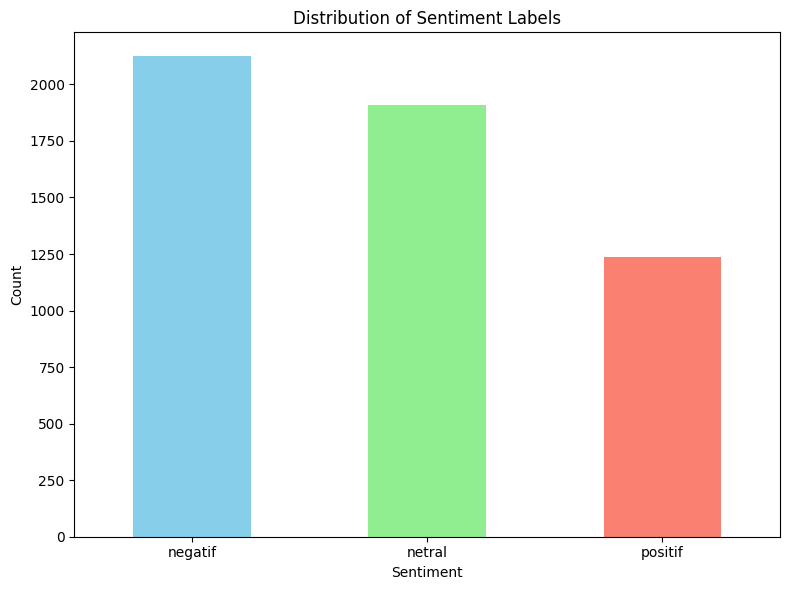

In [ ]:
sentiment_counts = df_stemmed['sentimen'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualisasi

## Wordcloud

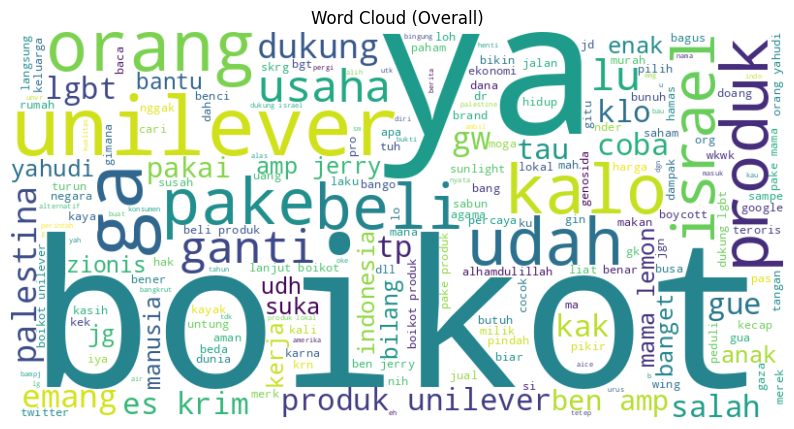

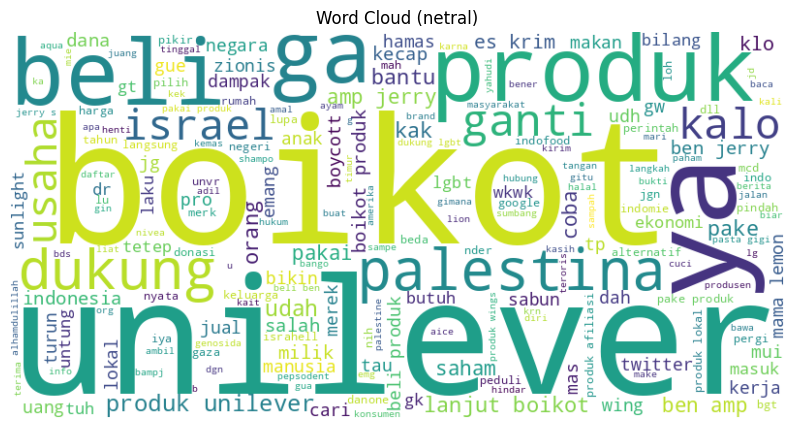

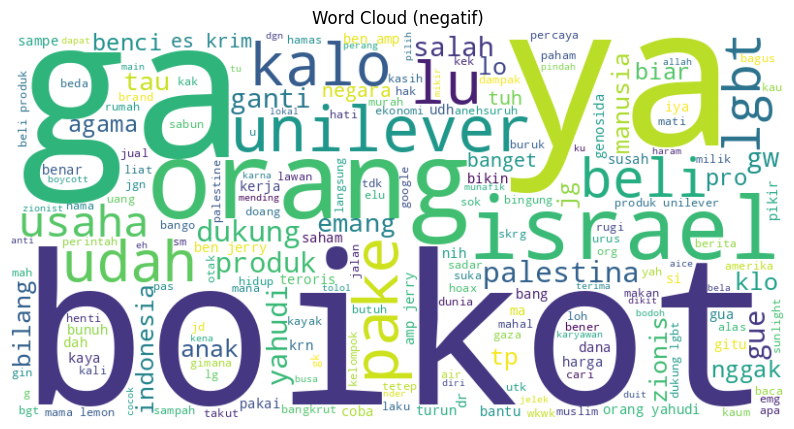

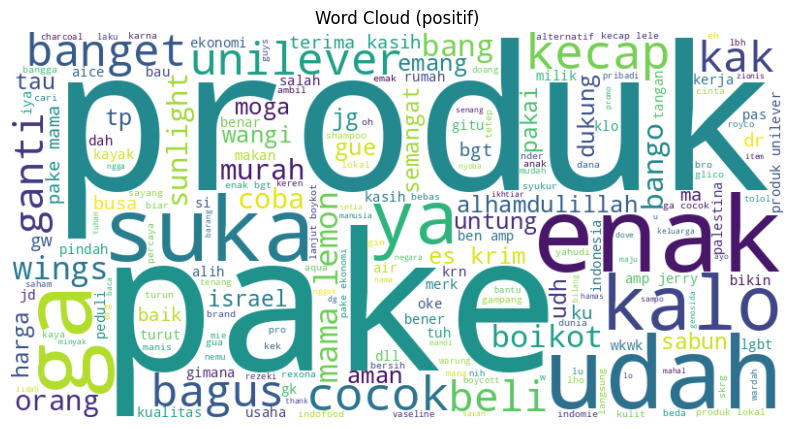

In [ ]:
# Wordcloud for all stemmed text
all_text = ' '.join(df_stemmed['stemmed_text'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Overall)')
plt.show()

# Wordclouds for each sentiment
sentiments = df_stemmed['sentimen'].unique()

for sentiment in sentiments:
    sentiment_text = ' '.join(df_stemmed[df_stemmed['sentimen'] == sentiment]['stemmed_text'])
    wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_sentiment, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud ({sentiment})')
    plt.show()

#Asosiasi Kata

In [ ]:
from collections import Counter

def get_top_words(dataframe, sentiment, n=5):
    sentiment_df = dataframe[dataframe['sentimen'] == sentiment]
    all_words = ' '.join(sentiment_df['stemmed_text']).split()
    word_counts = Counter(all_words)
    return [word for word, count in word_counts.most_common(n)]

sentiments = df_stemmed['sentimen'].unique()
top_words_by_sentiment = {}
for sentiment in sentiments:
    top_words_by_sentiment[sentiment] = get_top_words(df_stemmed, sentiment)

print("Top 5 words by sentiment:")
for sentiment, words in top_words_by_sentiment.items():
    print(f"{sentiment}: {words}")

Top 5 words by sentiment:
netral: ['boikot', 'produk', 'unilever', 'beli', 'ya']
negatif: ['boikot', 'orang', 'ya', 'ga', 'unilever']
positif: ['produk', 'pake', 'enak', 'ga', 'udah']


In [ ]:
from collections import defaultdict

def get_word_associations(dataframe, sentiment, keywords, window_size=5):
    sentiment_df = dataframe[dataframe['sentimen'] == sentiment]
    associations = defaultdict(Counter)
    for text in sentiment_df['stemmed_text']:
        words = text.split()
        for i, word in enumerate(words):
            if word in keywords:
                start = max(0, i - window_size)
                end = min(len(words), i + window_size + 1)
                context = words[start:end]
                for co_occurring_word in context:
                    if co_occurring_word != word:
                        associations[word][co_occurring_word] += 1
    return associations

keywords_to_associate = ['boikot', 'unilever']
word_associations_by_sentiment = {}

for sentiment in sentiments:
    sentiment_keywords = keywords_to_associate + top_words_by_sentiment[sentiment]
    # Remove duplicates from sentiment_keywords
    sentiment_keywords = list(set(sentiment_keywords))
    word_associations_by_sentiment[sentiment] = get_word_associations(df_stemmed, sentiment, sentiment_keywords)

print("Word Associations by Sentiment:")
for sentiment, associations in word_associations_by_sentiment.items():
    print(f"\nSentiment: {sentiment}")
    for keyword, associated_words in associations.items():
        print(f"  Keyword: {keyword}")
        # Display top 10 associated words for each keyword
        print(f"    Associated words: {associated_words.most_common(10)}")

Word Associations by Sentiment:

Sentiment: netral
  Keyword: produk
    Associated words: [('unilever', 137), ('boikot', 92), ('beli', 80), ('israel', 45), ('pakai', 36), ('pake', 34), ('dukung', 32), ('lokal', 31), ('ganti', 30), ('ya', 30)]
  Keyword: unilever
    Associated words: [('produk', 137), ('boikot', 78), ('beli', 44), ('ben', 24), ('ya', 23), ('ga', 22), ('pakai', 21), ('amp', 18), ('usaha', 18), ('dana', 16)]
  Keyword: boikot
    Associated words: [('lanjut', 101), ('produk', 92), ('unilever', 78), ('palestina', 41), ('dukung', 36), ('israel', 35), ('ga', 26), ('dampak', 26), ('ya', 25), ('kalo', 19)]
  Keyword: ya
    Associated words: [('produk', 30), ('boikot', 25), ('unilever', 23), ('beli', 20), ('kalo', 12), ('tetep', 9), ('udah', 9), ('pake', 9), ('ga', 8), ('tuh', 6)]
  Keyword: beli
    Associated words: [('produk', 80), ('unilever', 44), ('ben', 26), ('jerrys', 24), ('ya', 20), ('amp', 14), ('boikot', 13), ('kalo', 13), ('saham', 12), ('es', 12)]

Sentiment: n

##Co-Occurrence

In [ ]:
from collections import defaultdict
import itertools

def calculate_co_occurrence(dataframe, column, window_size=5):
    co_occurrence_counts = defaultdict(int)
    for text in dataframe[column]:
        words = text.split()
        # Ensure window size does not exceed text length
        current_window_size = min(window_size, len(words))
        for i in range(len(words)):
            # Define the window boundaries
            start = max(0, i - current_window_size)
            end = min(len(words), i + current_window_size + 1)
            window = words[start:end]
            # Get all unique pairs within the window
            for word1, word2 in itertools.combinations(sorted(window), 2):
                co_occurrence_counts[(word1, word2)] += 1
    return co_occurrence_counts

# Calculate co-occurrence for the stemmed text
co_occurrence_data = calculate_co_occurrence(df_stemmed, 'stemmed_text')

# Display the top co-occurring pairs
sorted_co_occurrence = sorted(co_occurrence_data.items(), key=lambda item: item[1], reverse=True)
print("Top 20 Co-occurring Word Pairs:")
for (word1, word2), count in sorted_co_occurrence[:20]:
    print(f"('{word1}', '{word2}'): {count}")

Top 20 Co-occurring Word Pairs:
('produk', 'unilever'): 1749
('boikot', 'produk'): 1323
('beli', 'produk'): 1114
('es', 'krim'): 1065
('boikot', 'unilever'): 998
('amp', 'ben'): 951
('ben', 'jerrys'): 948
('lemon', 'mama'): 849
('boikot', 'lanjut'): 838
('pake', 'produk'): 728
('dukung', 'lgbt'): 697
('produk', 'produk'): 668
('ben', 'jerry'): 649
('amp', 'jerrys'): 649
('orang', 'yahudi'): 648
('israel', 'produk'): 640
('boikot', 'israel'): 578
('ga', 'pake'): 548
('boikot', 'boikot'): 526
('produk', 'ya'): 517


In [ ]:
# Filter co-occurrence data based on a threshold
min_cooccurrence_count = 50
filtered_co_occurrence = {pair: count for pair, count in co_occurrence_data.items() if count >= min_cooccurrence_count}

print(f"Number of co-occurring pairs after filtering (>{min_cooccurrence_count}): {len(filtered_co_occurrence)}")

Number of co-occurring pairs after filtering (>50): 1733


In [ ]:
import networkx as nx

# Build the network graph
G = nx.Graph()

for (word1, word2), count in filtered_co_occurrence.items():
    G.add_edge(word1, word2, weight=count)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 498
Number of edges in the graph: 1733


In [ ]:
def get_dominant_sentiment(dataframe, word):
    sentiments = dataframe[dataframe['stemmed_text'].str.contains(r'\b' + re.escape(word) + r'\b')]['sentimen']
    if not sentiments.empty:
        return sentiments.mode()[0]
    return 'unknown'

# Determine dominant sentiment for each node (word) in the graph
dominant_sentiment = {}
for node in G.nodes():
    dominant_sentiment[node] = get_dominant_sentiment(df_stemmed, node)

# Add dominant sentiment as a node attribute
nx.set_node_attributes(G, dominant_sentiment, 'dominant_sentiment')

print("Dominant sentiment for a few sample nodes:")
for i, (node, sentiment) in enumerate(dominant_sentiment.items()):
    if i < 10:
        print(f"{node}: {sentiment}")
    else:
        break

Dominant sentiment for a few sample nodes:
pake: negatif
produk: netral
wings: positif
lu: negatif
ga: negatif
biar: negatif
boikot: netral
org: negatif
palestina: netral
coba: netral


##Topic Analysis

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

sentiments = df_stemmed['sentimen'].unique()
sentiment_models = {}
sentiment_topics = {}

for sentiment in sentiments:
    print(f"Performing topic modeling for sentiment: {sentiment}")
    # Filter data for the current sentiment
    df_sentiment = df_stemmed[df_stemmed['sentimen'] == sentiment].copy()

    if len(df_sentiment) > 0:
        # Initialize BERTopic model for the current sentiment
        # You might need to adjust parameters based on the size of the sentiment subset
        model = BERTopic(verbose=True)

        # Fit the model to the stemmed text data for the current sentiment
        topics, probabilities = model.fit_transform(df_sentiment['stemmed_text'])

        # Store the model and topics
        sentiment_models[sentiment] = model
        sentiment_topics[sentiment] = (topics, probabilities)

        print(f"Topic modeling completed for {sentiment}. Identified {len(model.get_topic_info())} topics.")
        # Optionally display topic info for the current sentiment
        display(model.get_topic_info())
    else:
        print(f"No data available for sentiment: {sentiment}")

2025-08-17 00:34:02,536 - BERTopic - Embedding - Transforming documents to embeddings.


Performing topic modeling for sentiment: netral


Batches:   0%|          | 0/60 [00:00<?, ?it/s]

2025-08-17 00:34:24,676 - BERTopic - Embedding - Completed ✓
2025-08-17 00:34:24,677 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-17 00:34:37,045 - BERTopic - Dimensionality - Completed ✓
2025-08-17 00:34:37,046 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-17 00:34:37,127 - BERTopic - Cluster - Completed ✓
2025-08-17 00:34:37,133 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-17 00:34:37,200 - BERTopic - Representation - Completed ✓


Topic modeling completed for netral. Identified 34 topics.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,598,-1_israel_dukung_udah_boikot,"[israel, dukung, udah, boikot, usaha, gt, ya, ...",[emg dh dukung israel list edar hoax klo gue p...
1,0,304,0_produk_unilever_beli_lokal,"[produk, unilever, beli, lokal, klo, pakai, ya...","[produk unilever, produk unilever, produk unil..."
2,1,121,1_boikot_lanjut_dampak_ayo,"[boikot, lanjut, dampak, ayo, bilang, aksi, ya...","[lanjut boikot, lanjut boikot, boikot lanjut]"
3,2,96,2_ben_jerrys_jerry_amp,"[ben, jerrys, jerry, amp, dana, potong, krim, ...","[dana unilever ben amp jerrys, beli ben amp je..."
4,3,71,3_palestina_lanjut_boikot_saudara,"[palestina, lanjut, boikot, saudara, juang, ba...","[boikot langkah nyata lanjut boikot palestina,..."
5,4,66,4_unilever_bla_jual_usaha,"[unilever, bla, jual, usaha, manajemen, kerja,...",[jual unilever anak usaha tuju situasi manajem...
6,5,52,5_israel_afiliasi_produk_zionis,"[israel, afiliasi, produk, zionis, pro, boikot...","[dukung boikot produk afiliasi israel, lanjut ..."
7,6,46,6_lgbt_twitter_dukung_apple,"[lgbt, twitter, dukung, apple, instagram, pro,...","[instagram gk boikot dukung lgbt tuh, ya kalo ..."
8,7,43,7_wings_lion_ganti_wing,"[wings, lion, ganti, wing, produk, group, indo...",[unilever boikot serang produk wings care lion...
9,8,31,8_beli_bampj_bampjs_bicara,"[beli, bampj, bampjs, bicara, ngaruh, tahun, s...","[muncul beli bampj cookie dough, henti beli ba..."


2025-08-17 00:34:37,336 - BERTopic - Embedding - Transforming documents to embeddings.


Performing topic modeling for sentiment: negatif


Batches:   0%|          | 0/67 [00:00<?, ?it/s]

2025-08-17 00:35:06,128 - BERTopic - Embedding - Completed ✓
2025-08-17 00:35:06,130 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-17 00:35:16,566 - BERTopic - Dimensionality - Completed ✓
2025-08-17 00:35:16,567 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-17 00:35:16,648 - BERTopic - Cluster - Completed ✓
2025-08-17 00:35:16,654 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-17 00:35:16,725 - BERTopic - Representation - Completed ✓


Topic modeling completed for negatif. Identified 34 topics.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,699,-1_ya_ga_orang_unilever,"[ya, ga, orang, unilever, kalo, beli, lu, udah...","[ya allah kasi bgt bang gue paham maksud lu, e..."
1,0,247,0_palestina_israel_hamas_zionis,"[palestina, israel, hamas, zionis, yahudi, ter...",[israel negara teroris mati idf zionists mati ...
2,1,190,1_produk_unilever_boikot_beli,"[produk, unilever, boikot, beli, brand, israel...",[isu boikot emang laba turun mulu harga produk...
3,2,149,2_lgbt_dukung_lu_orang,"[lgbt, dukung, lu, orang, ya, lgbtq, gay, ga, ...","[pakai ga dukung lgbt ga otak dukung lgbt, duk..."
4,3,107,3_boikot_lanjut_kena_dampak,"[boikot, lanjut, kena, dampak, ngaruh, gw, dik...","[gampang boikot yuk lanjut boikot, bener boiko..."
5,4,61,4_pake_kalo_ga_nyalahin,"[pake, kalo, ga, nyalahin, gpp, nder, chffffff...",[gpp nder klo udh kebel pake jgn buang mubazir...
6,5,51,5_malu_nih_bau_baca,"[malu, nih, bau, baca, lambat, kau, kaum, lu, ...","[really bro lu baca kitab, kaum nih kaum hared..."
7,6,45,6_manusia_agama_islam_lo,"[manusia, agama, islam, lo, salah, ya, gua, su...",[bikin manusia bacot lo ribut ngatain orng mun...
8,7,40,7_ben_jerrys_jerry_amp,"[ben, jerrys, jerry, amp, krim, es, henti, dan...","[panik beli ben amp jerrys es krim, gue ben am..."
9,8,38,8_emg_kosong_emang_tekan,"[emg, kosong, emang, tekan, omong, sodok, anus...","[makan omong kosong, omong kosong, saham unile..."


2025-08-17 00:35:16,881 - BERTopic - Embedding - Transforming documents to embeddings.


Performing topic modeling for sentiment: positif


Batches:   0%|          | 0/39 [00:00<?, ?it/s]

2025-08-17 00:35:29,874 - BERTopic - Embedding - Completed ✓
2025-08-17 00:35:29,876 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-17 00:35:34,861 - BERTopic - Dimensionality - Completed ✓
2025-08-17 00:35:34,866 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-17 00:35:34,931 - BERTopic - Cluster - Completed ✓
2025-08-17 00:35:34,936 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-17 00:35:34,986 - BERTopic - Representation - Completed ✓


Topic modeling completed for positif. Identified 29 topics.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,391,-1_unilever_udah_bagus_ga,"[unilever, udah, bagus, ga, murah, enak, suka,...",[kecap bango lokal diakusisi sma unilever sebe...
1,0,112,0_kecap_kalo_bango_enak,"[kecap, kalo, bango, enak, cocok, ku, pake, ga...",[coba pindah kecap lele bang toko kelontong by...
2,1,98,1_produk_cocok_lokal_kualitas,"[produk, cocok, lokal, kualitas, unilever, ga,...","[bagus pakai produk lokal, alhamdulillah udah ..."
3,2,67,2_peduli_pikir_salah_percaya,"[peduli, pikir, salah, percaya, orang, sayang,...","[peduli, orang percaya laku, salah diri yahudi..."
4,3,57,3_again_screenshot_thx_lol,"[again, screenshot, thx, lol, bro, ya, bye, bo...","[great thx info, but may again, nikmat screens..."
5,4,35,4_kak_kejut_kendor_kapos,"[kak, kejut, kendor, kapos, kah, kasih, lanjut...","[jgn kasih kendor, kak juluk good day girl, la..."
6,5,34,5_bang_jago_udah_tau,"[bang, jago, udah, tau, yours, dude, know, wha...",[dude i know and made a point about it whats y...
7,6,33,6_sunlight_pake_sabun_tangan,"[sunlight, pake, sabun, tangan, mama, bau, eko...",[mama lime gt sunlight isu nyokap suka sunligh...
8,7,31,7_wings_dangdut_produk_capek,"[wings, dangdut, produk, capek, group, oke, li...","[ekonomi wings kak, wings kak, produk wings]"
9,8,29,8_terima_kasih_re_yaa,"[terima, kasih, re, yaa, bayi, ok, oh, aplikas...","[terima kasih tuhan, terima kasih unilever, te..."


from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

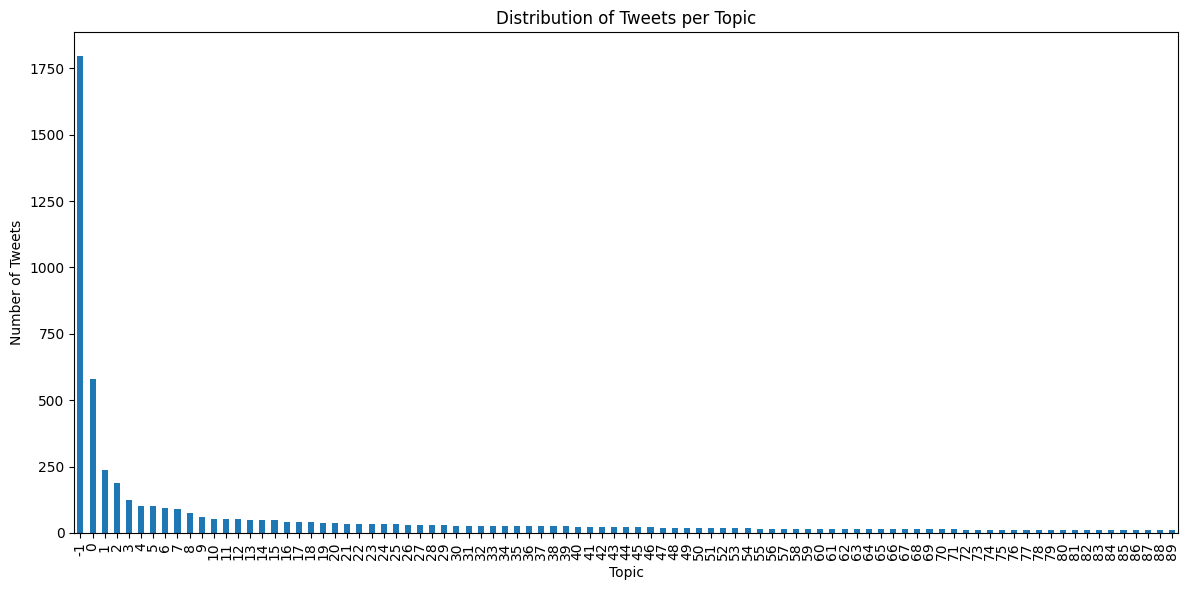

In [ ]:
topic_counts = df_stemmed['topic'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Tweets per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# New Section

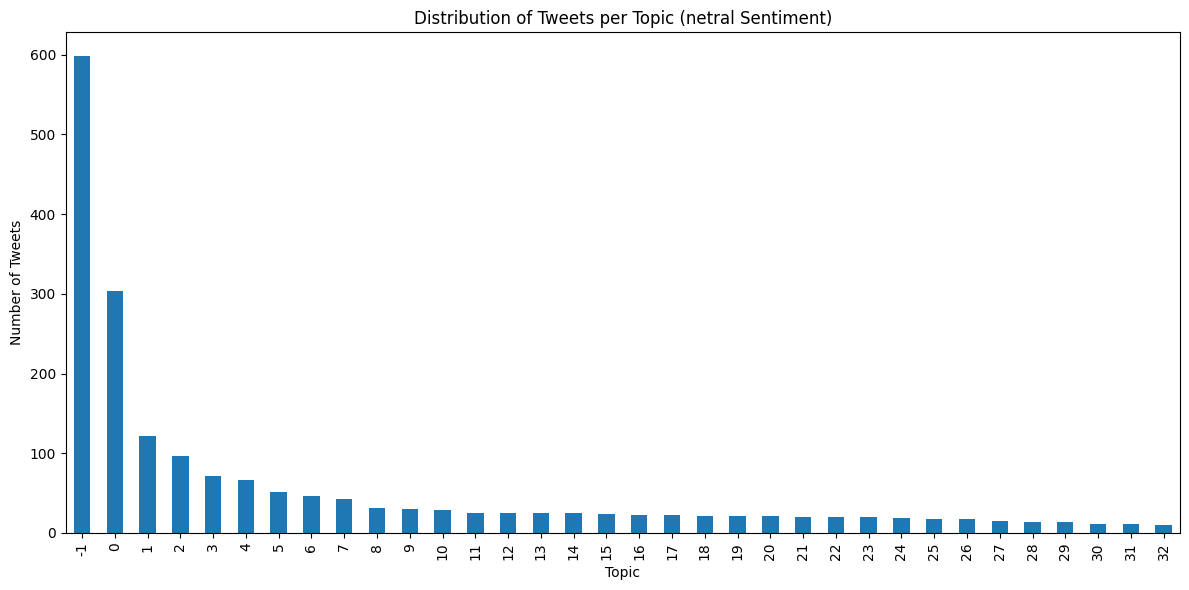

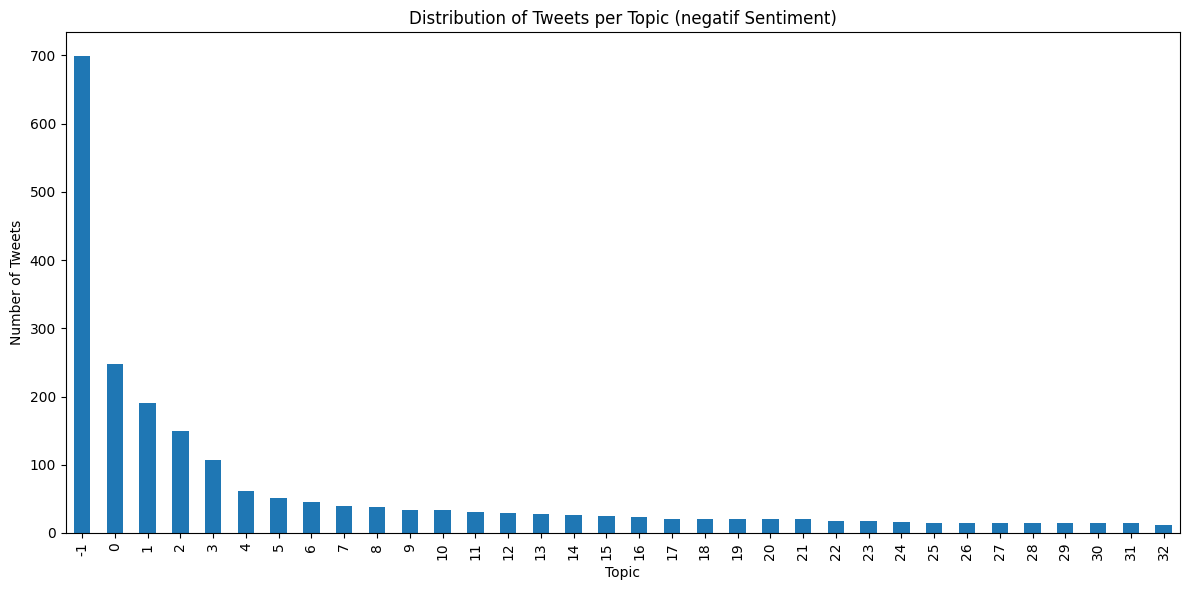

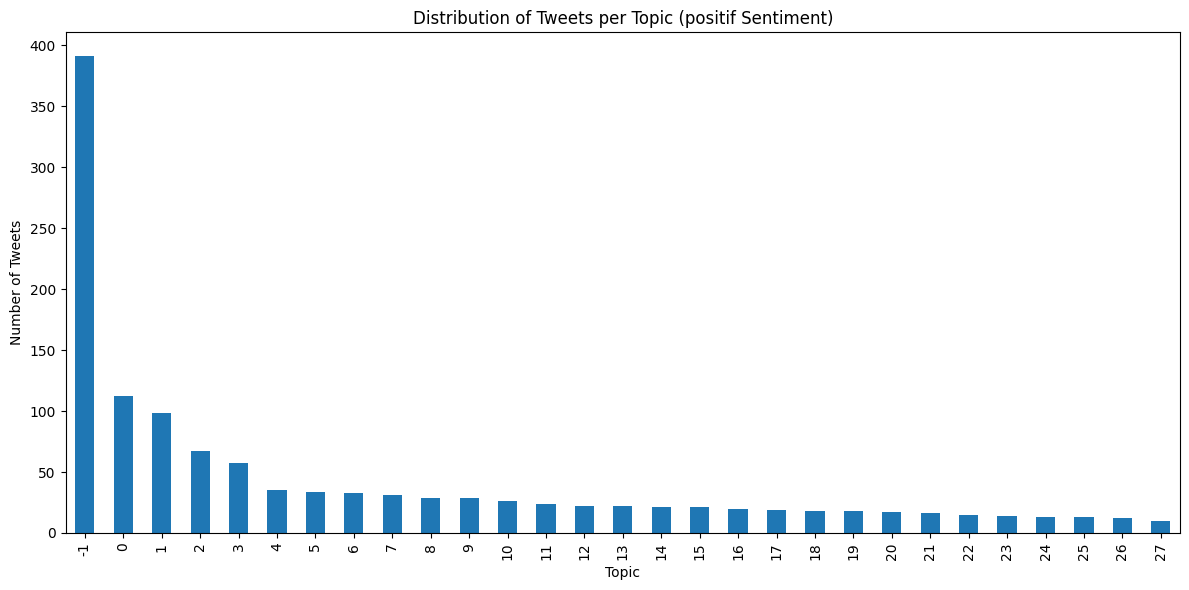

In [ ]:
# Visualize topic distribution for each sentiment
sentiments = df_stemmed['sentimen'].unique()

for sentiment in sentiments:
    if sentiment in sentiment_topics:
        topics, probabilities = sentiment_topics[sentiment]
        if len(topics) > 0:
            topic_counts = pd.Series(topics).value_counts().sort_index()

            plt.figure(figsize=(12, 6))
            topic_counts.plot(kind='bar')
            plt.title(f'Distribution of Tweets per Topic ({sentiment} Sentiment)')
            plt.xlabel('Topic')
            plt.ylabel('Number of Tweets')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No topics found for {sentiment} sentiment.")
    else:
        print(f"Topic information not available for {sentiment} sentiment.")